In [1]:
from qiskit import QuantumCircuit, execute
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi

# Caderno de Tópicos de Física III

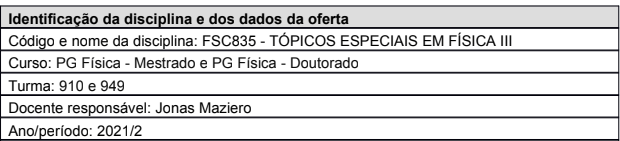

A dinâmica é escolher algum assunto para liderar o seu entendimento e implementação.

#### Os que me interessaram, em ordem

* __Swap de emaranhamento__

* __Swap de estados__

* __Emaranhamento__

* __Discórdia quântica__



# ................................................................................

# Swap de Emaranhamento

O algorítmo cria dois estados de bell emaranhados realizando um teleporte de emaranhamento. São realizadas duas medidas projetivas e aplicando duas portas que dependem do resultados das medidas.
 * Introdução
 * Circuito
 * Matemática
 * Conclusão

### Load accout

In [1]:
import qiskit
from qiskit.tools.monitor import backend_overview, backend_monitor
#qiskit.__qiskit_version__
qiskit.IBMQ.save_account('7cc830e0cb005ce6de9caf9c402a1992c5d38d25af4237c19e72a4c58ce204481eb7a0d08b9929e5b5d3028f3146c38d2da8f2eb8db8f6f8b02a97eeb8fbc6de', 
                  overwrite = True)
qiskit.IBMQ.load_account();

KeyboardInterrupt: 

### Define o device

In [3]:
#provider = qiskit.IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
#provider.backends()
simulator = provider.get_backend('ibmq_qasm_simulator')
device = provider.get_backend('ibmq_lima')#ibmq_belem')
#backend_overview()

In [4]:
from qiskit import *
%matplotlib inline

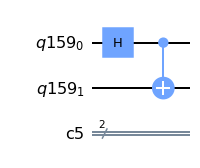

In [36]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)
qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl')

In [17]:
def print_state(qc):
    stv1 = qi.Statevector.from_instruction(qc)
    sim = QasmSimulator();options = {'method': 'statevector'}
    execute(qc, sim, backend_options=options)
    return stv1.draw('latex', prefix='Statevector1:')
print_state(qc)

<IPython.core.display.Latex object>

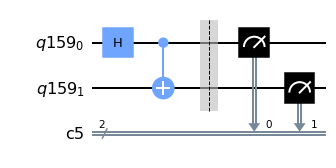

In [37]:
#esse circuito mede o circuito anterior
meas = QuantumCircuit(2,2)
meas.barrier()
meas.measure(0,0)
meas.measure(1,1)
#meas.measure([0,1], [0,1])
circ = qc.compose(meas)
circ.draw(output='mpl')
#print_state(circ)

{'11': 4023, '00': 4169}


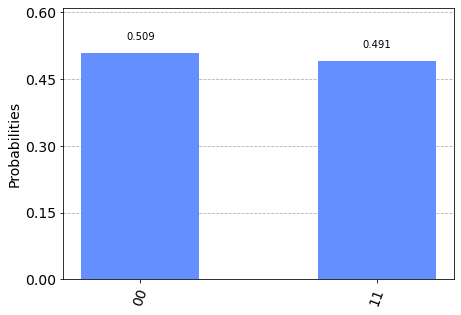

In [38]:
from qiskit.tools.visualization import plot_histogram

# execute the quantum circuit with measures
backend = BasicAer.get_backend('qasm_simulator') # the device to run on

result = backend.run(transpile(circ, backend), shots=8192).result()
counts  = result.get_counts(circ)
print(counts)
plot_histogram(counts)

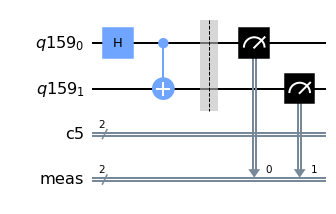

In [39]:
def Set_State_t0(qc):
    first = QuantumCircuit(2, 2)
    first.x(0)
    circ=first.compose(qc)
    return circ
def Measure(qc):
    circuit_with_results = qc
    circuit_with_results.measure_all()
    return circuit_with_results

circuit_with_results=Measure(qc)
#circ = inicial.compose(qc)
circuit_with_results.draw(output='mpl')

{'11 00': 487, '00 00': 513}


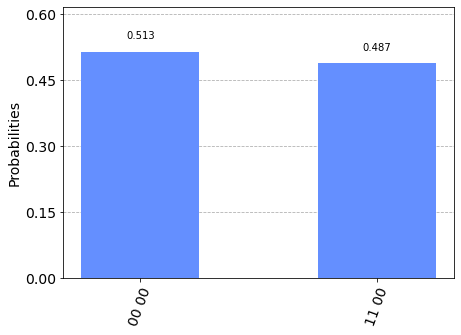

In [40]:
# execute the quantum circuit_with_results
backend = BasicAer.get_backend('qasm_simulator') # the device to run on

result = backend.run(transpile(circuit_with_results, backend), shots=1000).result()
counts  = result.get_counts(circuit_with_results)
print(counts)
plot_histogram(counts)

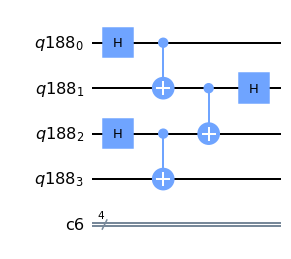

In [41]:
from qiskit import  QuantumCircuit
q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q,c)

qc.h(0)
qc.h(2)
qc.cx(0,1)
qc.cx(2,3)
qc.cx(1,2)
qc.h(1)
qc.draw('mpl')

In [42]:
print_state(qc)

<IPython.core.display.Latex object>

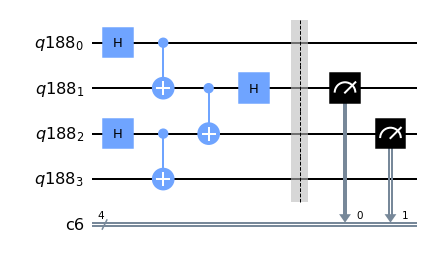

In [43]:
#esse circuito mede o circuito anterior
meas = QuantumCircuit(4,4)
meas.barrier()
meas.measure(1,0)
meas.measure(2,1)
#meas.measure([0,1], [0,1])
circ = qc.compose(meas)
circ.draw(output='mpl')
#print_state(circ)

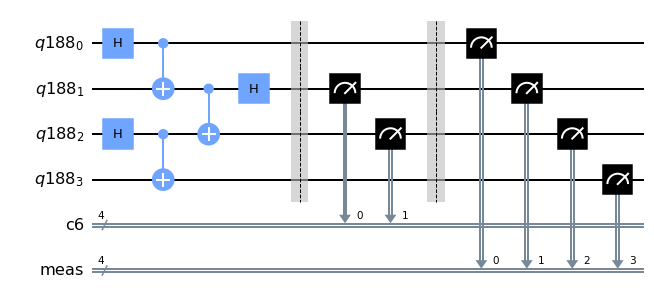

In [44]:
circuit_with_results=Measure(circ)
circuit_with_results.draw(output='mpl')

{'0101 0010': 116, '1100 0010': 115, '0111 0011': 139, '0010 0001': 124, '1110 0011': 119, '1001 0000': 127, '1011 0001': 132, '0000 0000': 128}


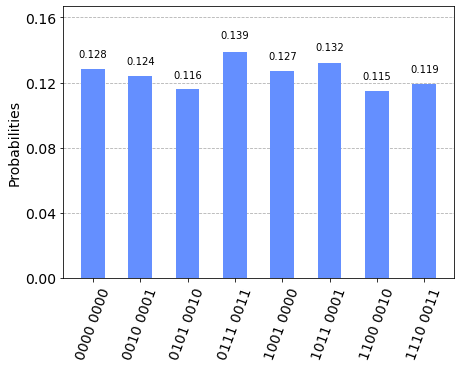

In [53]:
# execute the quantum circuit_with_results
backend = BasicAer.get_backend('qasm_simulator') # the device to run on

result = backend.run(transpile(circuit_with_results, backend), shots=1000).result()
counts  = result.get_counts(circuit_with_results)
print(counts)
plot_histogram(counts)

{'11': 518, '00': 482}


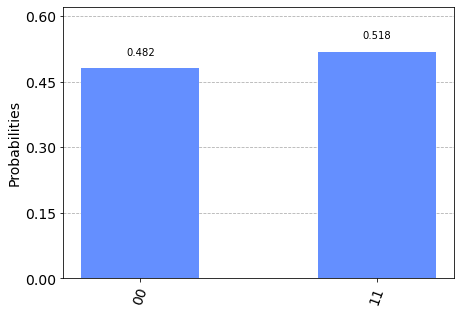

In [189]:
# execute the quantum circuit_with_results
circuit_with_results=Measure(qc)
backend = BasicAer.get_backend('qasm_simulator') # the device to run on

result = backend.run(transpile(circuit_with_results, backend), shots=1000).result()
counts  = result.get_counts(circuit_with_results)
print(counts)
plot_histogram(counts)

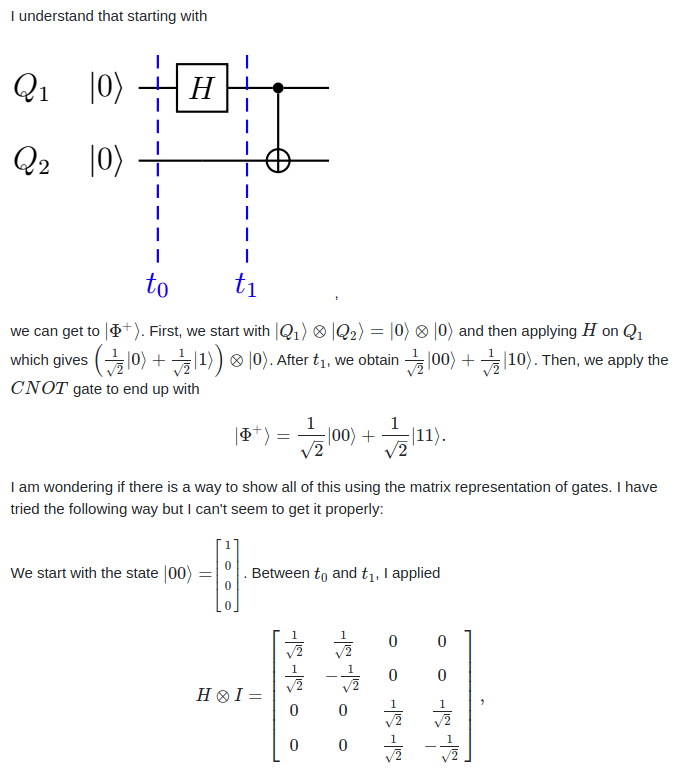
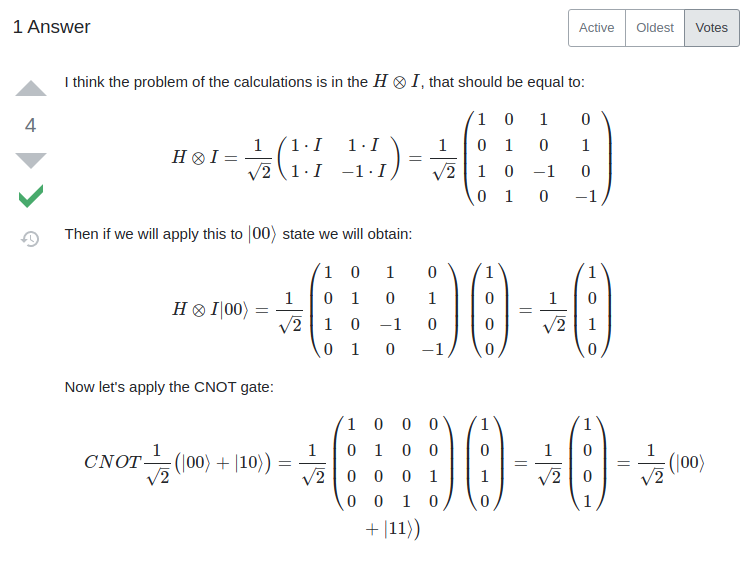

# Math

https://quantumcomputing.stackexchange.com/questions/11512/show-how-the-bell-state-arises-from-the-circuit-with-hadamard-and-cnot-using-ma
.

A base computacional
$$\begin{align*}
    &|0\rangle =  \begin{bmatrix}
    1 \\
    0 \\
    \end{bmatrix}\\
    &|1\rangle =  \begin{bmatrix}
    0 \\
    1 \\
    \end{bmatrix}
\end{align*}$$

Vamos supor que o estado inicial dos dois qubits seja $|0\rangle$, qual seria o estado final ?

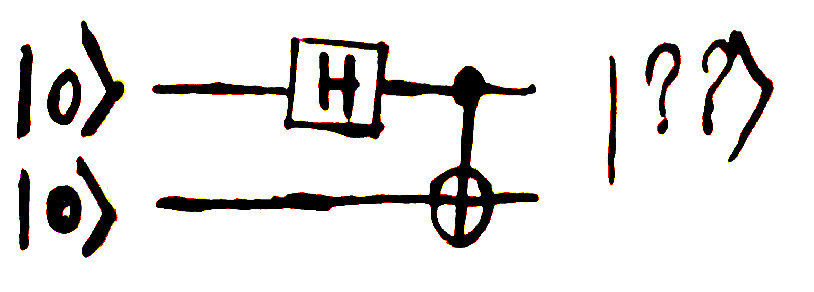

Nesse circuito encontram-se:
* __Haddammard__
$$\begin{align*}
    &H= \left(\frac{1}{\sqrt{2}}\right)\begin{bmatrix}
    1 & 1 \\
    1 & -1 \\
    \end{bmatrix}\\
 \end{align*}$$
* __$C_{NOT}$__
 $$\begin{align*}
    &C_{NOT}= \begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
    \end{bmatrix}\\
 \end{align*}$$

##### Aplicando H

$$\begin{align}
    &H|0\rangle = \left(\frac{1}{\sqrt{2}}\right)\begin{bmatrix}
    1 & 1 \\
    1 & -1 \\
    \end{bmatrix}\begin{bmatrix}
    1 \\
    0 \\
    \end{bmatrix}=\frac{1}{\sqrt{2}}\begin{bmatrix}
    1 \\
    1 \\
    \end{bmatrix}\\
    &H|0\rangle = \frac{1}{\sqrt{2}}\left(\begin{bmatrix}
    1 \\
    0 \\
    \end{bmatrix}+\begin{bmatrix}
    0 \\
    1 \\
    \end{bmatrix}\right)\\
    &\boxed{H|0\rangle  = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right) = |+\rangle}\\
 \end{align}$$
 
 #### Calculando o sistema composto dos dois qubits
 
 $$H|0\rangle\otimes|0\rangle  = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)\otimes|0\rangle
 $$
 $$H|0\rangle\otimes|0\rangle  = \frac{1}{\sqrt{2}}\left(\begin{bmatrix}
    1  \\
    0  \\
    \end{bmatrix}\otimes\begin{bmatrix}
    1  \\
    0  \\
    \end{bmatrix}+\begin{bmatrix}
    0  \\
    1  \\
    \end{bmatrix}\otimes\begin{bmatrix}
    1  \\
    0  \\
    \end{bmatrix}\right)
 $$
 $$H|0\rangle\otimes|0\rangle  =\frac{1}{\sqrt{2}}\left(\begin{bmatrix}
    1  \\
    0  \\
    0  \\
    0  \\
    \end{bmatrix}+\begin{bmatrix}
    0  \\
    0  \\
    1  \\
    0  \\
    \end{bmatrix}\right)
 $$
  $$H|0\rangle\otimes|0\rangle  =\frac{1}{\sqrt{2}}\left(|00\rangle+|10\rangle\right)
 $$
 
 
 Agora, aplicando uma porta $C_{NOT}$, nada ocorrerá no estado $|00\rangle$ e $C_{NOT}|10\rangle = |11\rangle$.
 
 Com isso obtemos o estado:
 $$|\Phi^+\rangle = \frac{1}{2}\left(|00\rangle+|11\rangle\right)
 $$
 

##### Aplicando H 2
$$
\begin{align}
    &H|0\rangle = \left(\frac{1}{\sqrt{2}}\right)\begin{bmatrix}
    1 & 1 \\
    1 & -1 \\
    \end{bmatrix}\begin{bmatrix}
    1 \\
    0 \\
    \end{bmatrix}=\frac{1}{\sqrt{2}}\begin{bmatrix}
    1 \\
    1 \\
    \end{bmatrix}
    &H|1\rangle = \left(\frac{1}{\sqrt{2}}\right)\begin{bmatrix}
    1 & 1 \\
    1 & -1 \\
    \end{bmatrix}\begin{bmatrix}
    0 \\
    1 \\
    \end{bmatrix}=\frac{1}{\sqrt{2}}\begin{bmatrix}
    1 \\
    -1 \\
    \end{bmatrix}\\
    &H|0\rangle = \frac{1}{\sqrt{2}}\left(\begin{bmatrix}
    1 \\
    0 \\
    \end{bmatrix}+\begin{bmatrix}
    0 \\
    1 \\
    \end{bmatrix}\right)
    &H|1\rangle = \frac{1}{\sqrt{2}}\left(\begin{bmatrix}
    1 \\
    0 \\
    \end{bmatrix}-\begin{bmatrix}
    0 \\
    1 \\
    \end{bmatrix}\right)\\
    &\boxed{H|0\rangle  = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right) = |+\rangle}
    &\boxed{H|1\rangle  = \frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right) = |-\rangle}\\
 \end{align} $$
 

##### Aplicando $C_{NOT} H |0\rangle$ 
$$
\begin{align}
    &C_{NOT}H|0\rangle\otimes|0\rangle = \left(\frac{1}{\sqrt{2}}\right)\begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
    \end{bmatrix}\left(\frac{1}{\sqrt{2}}\right)\begin{bmatrix}
    1 & 1 \\
    1 & -1 \\
    \end{bmatrix}\begin{bmatrix}
    1 \\
    0 \\
    \end{bmatrix}\\
    &C_{NOT}H|0\rangle\otimes|0\rangle =\frac{1}{2}\begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
    \end{bmatrix}\left(|0\rangle+|1\rangle\right)\\
    &C_{NOT}H|0\rangle\otimes|0\rangle =\frac{1}{2}\begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
    \end{bmatrix}|0\rangle + \frac{1}{2}
    \begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
    \end{bmatrix}|1\rangle\\
    &C_{NOT}H|0\rangle\otimes|0\rangle =\frac{1}{2}\begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
    \end{bmatrix}\begin{bmatrix}
    1 \\
    0 \\
    \end{bmatrix} + \frac{1}{2}
    \begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
    \end{bmatrix}\begin{bmatrix}
    0 \\
    1 \\
    \end{bmatrix}
    \\    
 \end{align} $$

$$
\begin{align}
    &C_{NOT}H|0\rangle\otimes|0\rangle = \left(\frac{1}{\sqrt{2}}\right)\begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
    \end{bmatrix}\left(\frac{1}{\sqrt{2}}\right)\begin{bmatrix}
    1 & 1 \\
    1 & -1 \\
    \end{bmatrix}\begin{bmatrix}
    1 \\
    0 \\
    \end{bmatrix}\\
    &C_{NOT}H|0\rangle\otimes|0\rangle =\frac{1}{2}\begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
    \end{bmatrix}\left(|0\rangle+|1\rangle\right)\\
    &C_{NOT}H|0\rangle\otimes|0\rangle =\frac{1}{2}\begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
    \end{bmatrix}|0\rangle + \frac{1}{2}
    \begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
    \end{bmatrix}|1\rangle\\
    &C_{NOT}H|0\rangle\otimes|0\rangle =\frac{1}{2}\begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
    \end{bmatrix}\begin{bmatrix}
    1 \\
    0 \\
    \end{bmatrix} + \frac{1}{2}
    \begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
    \end{bmatrix}\begin{bmatrix}
    0 \\
    1 \\
    \end{bmatrix}\\
    &C_{NOT}H|0\rangle\otimes|0\rangle =\frac{1}{2}\left(\begin{bmatrix}
    1 \\
    0 \\
    0 \\
    0 \\
    \end{bmatrix}+ 
    \begin{bmatrix}
    0 \\
    1 \\
    0 \\
    0 \\
    \end{bmatrix}\right)\\    
 \end{align} $$

\begin{align}
    &C_{NOT}H|0\rangle =\frac{1}{2}\left(|00\rangle+|01\rangle\right)\\    
 \end{align} 

In [11]:
# iniciamos um segundo circuito pra realizar a medida
meas = QuantumCircuit(2, 2)
meas.x(0)
#meas.x(1)
meas.measure([0,1], [0,1])

# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = qc.compose(meas)
result = backend.run(transpile(circ, backend), shots=1000).result()
counts  = result.get_counts(circ)
print(counts)
plot_histogram(counts)

CircuitError: 'register size error'

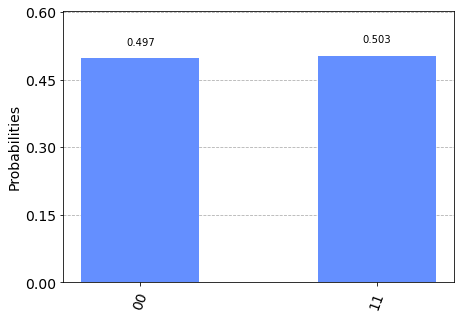

$$
\begin{align}
    &\sigma_{1} = \begin{bmatrix}
    0 & 1 \\
    1 & 0 \\
    \end{bmatrix}\\
    &\sigma_{2} = \begin{bmatrix}
    0 & -i    \\
    i & 0 \\
    \end{bmatrix}\\
    &\sigma_{3} = \begin{bmatrix}
    1 & 0 \\
    0 & -1 \\
    \end{bmatrix}
 \end{align}
 $$

{'0011 0000': 266, '0000 0000': 241, '1100 0000': 267, '1111 0000': 226}


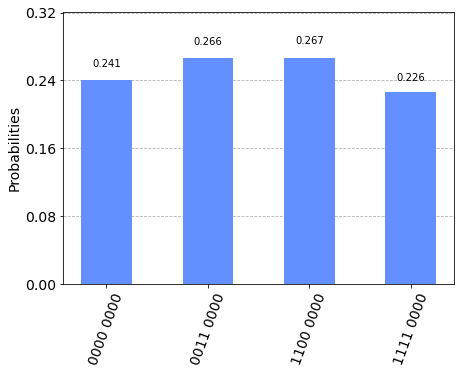

In [419]:
from qiskit import  QuantumCircuit
q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q,c)

qc.h(0)
qc.h(2)
qc.cx(0,1)
qc.cx(2,3)
qc.draw('mpl')

circuit_with_results=Measure(qc)


backend = BasicAer.get_backend('qasm_simulator') # the device to run on

result = backend.run(transpile(circuit_with_results, backend), shots=1000).result()
counts  = result.get_counts(circuit_with_results)
print(counts)
plot_histogram(counts)



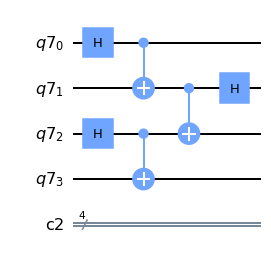

In [10]:
from qiskit import  QuantumCircuit
q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q,c)

qc.h(0)
qc.h(2)
qc.cx(0,1)
qc.cx(2,3)
qc.cx(1,2)
qc.h(1)
qc.draw('mpl')

O estado depois desse circuito é :
$$|\Psi_4\rangle = \frac{1}{2\sqrt{2}}\left(|0000\rangle-|0111\rangle+|1100\rangle-|1011\rangle+|0010\rangle+|0101\rangle+|1110\rangle+|1001\rangle\right)
$$

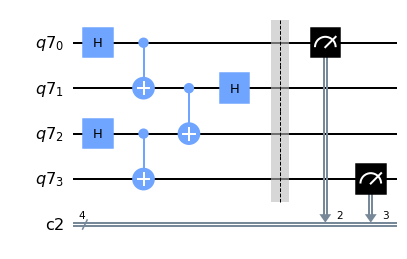

In [13]:
meas = QuantumCircuit(4, 4)
#meas.x(0)
meas.barrier()
meas.measure([0,3],[2,3])
circ = qc.compose(meas)
circ.draw('mpl')

{'1001': 132, '1110': 121, '0010': 134, '0101': 113, '1100': 131, '0000': 124, '1011': 119, '0111': 126}


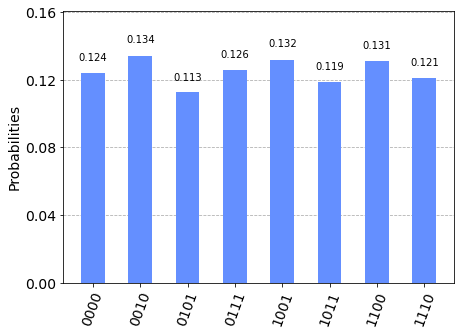

In [330]:
backend = BasicAer.get_backend('qasm_simulator')
result = backend.run(transpile(circ, backend), shots=1000).result()
counts  = result.get_counts(circ)
print(counts)
plot_histogram(counts)

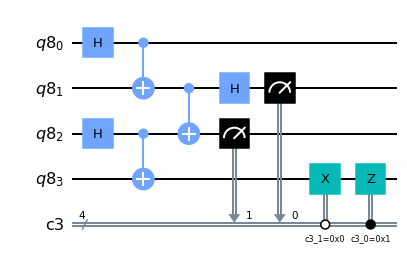

In [14]:
from qiskit import  QuantumCircuit
q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q,c)

qc.h(0)
qc.h(2)
qc.cx(0,1)
qc.cx(2,3)
qc.cx(1,2)
qc.h(1)
qc.measure([1,2],[0,1])
qc.x(q[3]).c_if(1, 0)
qc.z(q[3]).c_if(0, 1)
#qc.measure(q,c)
#qc.measure(2,1)

#qc.measure([0,3], [2,3])
qc.draw('mpl')

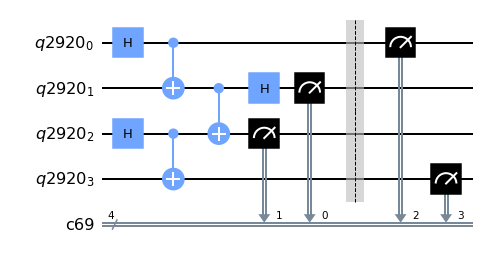

In [410]:
circuit_with_results=qc
circuit_with_results.barrier()
circuit_with_results.measure(0,2)
circuit_with_results.measure(3,3)
circuit_with_results.draw('mpl')

{'1011': 119, '1101': 123, '0110': 136, '0001': 121, '0000': 132, '0111': 117, '1100': 125, '1010': 127}


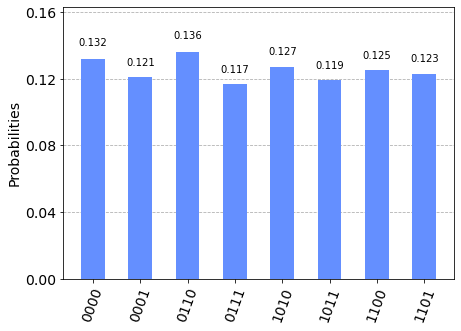

In [411]:

backend = BasicAer.get_backend('qasm_simulator') # the device to run on

result = backend.run(transpile(circuit_with_results, backend), shots=1000).result()
counts  = result.get_counts(circuit_with_results)
print(counts)
plot_histogram(counts)

{'0110': 113, '0111': 120, '0100': 119, '1010': 131, '0101': 128, '1001': 127, '1011': 127, '1000': 135}


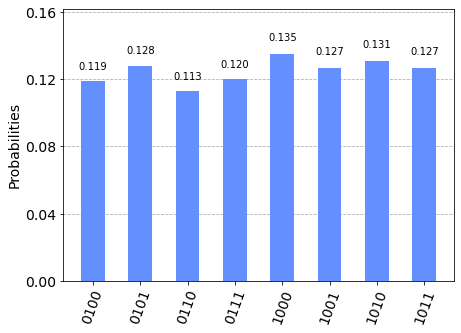

In [389]:
meas = QuantumCircuit(4, 4)
#meas.x(0)
meas.measure([0,3], [2,3])
circ = qc.compose(meas)
circ.draw('mpl')
backend = BasicAer.get_backend('qasm_simulator')
result = backend.run(transpile(circ, backend), shots=1000).result()
counts  = result.get_counts(circ)
print(counts)
plot_histogram(counts)

In [317]:
meas = QuantumCircuit(4, 4)
#meas.x(0)
meas.measure([0,3], [2,3])

# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = qc.compose(meas)

result = backend.run(transpile(circ, backend), shots=1000).result()
result2 = backend.run(transpile(circ, backend), shots=1000).result()
result3 = backend.run(transpile(circ, backend), shots=1000).result()
result4 = backend.run(transpile(circ, backend), shots=1000).result()

counts  = result.get_counts(circ)
counts2  = result2.get_counts(circ)
counts3  = result3.get_counts(circ)
counts4  = result4.get_counts(circ)
print(counts)

{'1110': 123, '0100': 131, '0010': 130, '1011': 131, '0111': 108, '1000': 138, '0001': 104, '1101': 135}


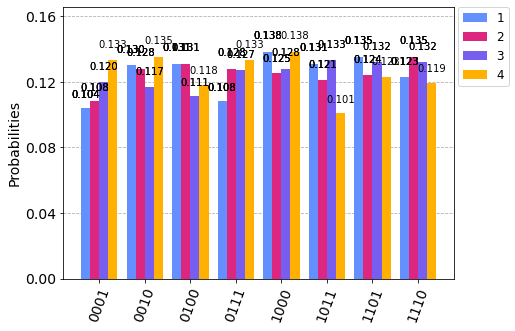

In [318]:

# Plot results with legend
legend = ['1', '2', '3', '4']
plot_histogram([counts, counts2,counts3,counts4], legend=legend)

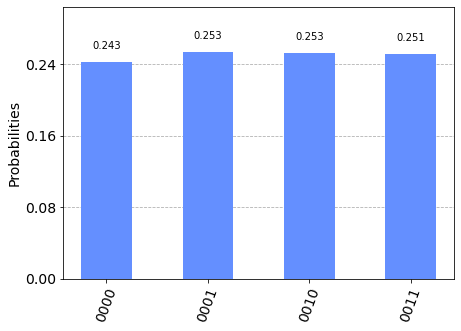

In [96]:

simulator = Aer.get_backend('qasm_simulator')
nshots = 8192
result = execute(qc,backend = simulator,shots = nshots).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(qc))

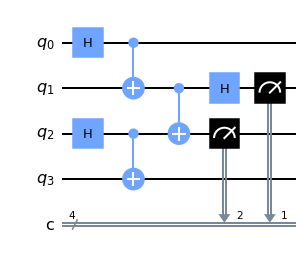

In [2]:
from qiskit import  QuantumCircuit

qc = QuantumCircuit(4,4)

qc.h(0)
qc.h(2)
qc.cx(0,1)
qc.cx(2,3)
qc.cx(1,2)
qc.h(1)
qc.measure(1,1)
qc.measure(2,2)

qc.draw('mpl')

#### Swap de Emaranhamento

O algorítmo cria dois estados de bell emaranhados realizando um teleporte de emaranhamento. São realizadas duas medidas projetivas e aplicando duas portas que dependem do resultados das medidas.

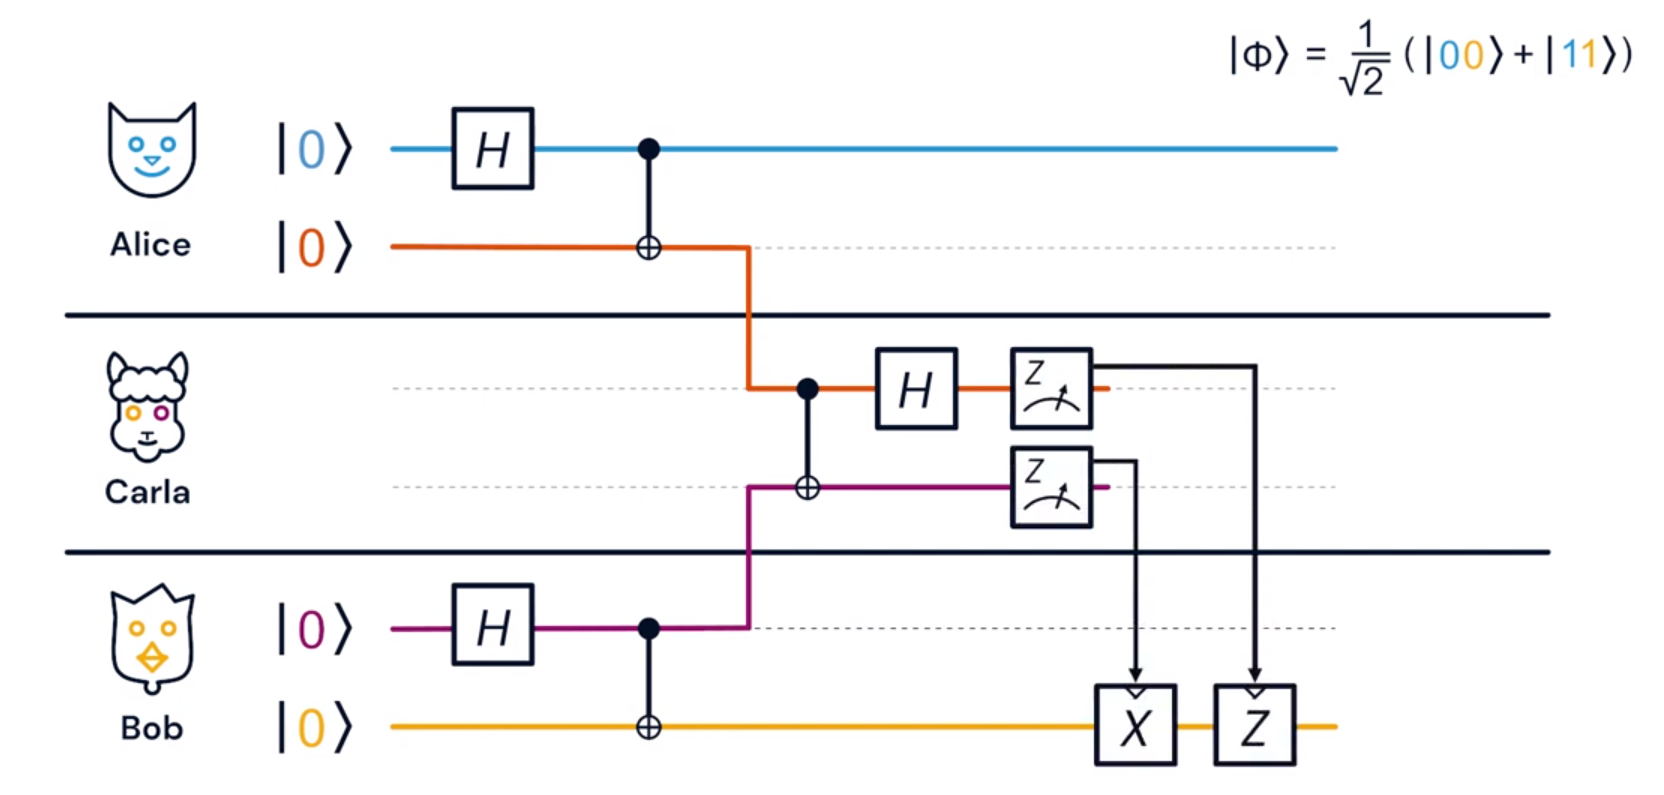

Esse algorítmo nos dá a possibilidade de criar um par emaranhado $q_0$ e $q_3$.

* __O que tem de interessante__
Com esse algorítmo a Alice e o Bob podem estar distantes e criar um par de estados emaranhados.
Em uma fila de átomos podemos emaranhar o primeiro e o 85º átomo fazendo isso..

* __Dúvidas__
 * Então a Carla deve receber 1 qubit da alice, pq ela não envia este estado direto pro bob? A carla deve estar em uma distância média entre A e B?

 * Explicitar as contas do algorítmo.

# Caderno de Tópicos de Física III

![image.png](attachment:image.png)

A dinâmica é escolher algum assunto para liderar o seu entendimento e implementação.

#### Os que me interessaram, em ordem

* __Swap de emaranhamento__

* __Swap de estados__

* __Emaranhamento__

* __Discórdia quântica__



# ................................................................................

# Swap de Emaranhamento

O algorítmo cria dois estados de bell emaranhados realizando um teleporte de emaranhamento. São realizadas duas medidas projetivas e aplicando duas portas que dependem do resultados das medidas.
 * Introdução
 * Circuito
 * Matemática
 * Conclusão


#### Swap de Emaranhamento

O algorítmo cria dois estados de bell emaranhados realizando um teleporte de emaranhamento. São realizadas duas medidas projetivas e aplicando duas portas que dependem do resultados das medidas.

![image.png](attachment:image.png)

Esse algorítmo nos dá a possibilidade de criar um par emaranhado $q_0$ e $q_3$.

* __O que tem de interessante__
Com esse algorítmo a Alice e o Bob podem estar distantes e criar um par de estados emaranhados.
Em uma fila de átomos podemos emaranhar o primeiro e o 85º átomo fazendo isso..

* __Dúvidas__
 * Então a Carla deve receber 1 qubit da alice, pq ela não envia este estado direto pro bob? A carla deve estar em uma distância média entre A e B?

 * Explicitar as contas do algorítmo.

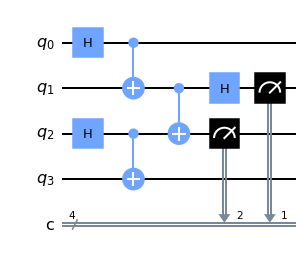

In [40]:

from qiskit import  QuantumCircuit

qc = QuantumCircuit(4,4)

qc.h(0)
qc.h(2)
qc.cx(0,1)
qc.cx(2,3)
qc.cx(1,2)
qc.h(1)
qc.measure(1,1)
qc.measure(2,2)

qc.draw('mpl')

from qiskit import  QuantumCircuit

qc = QuantumCircuit(4,4)

qc.h(0)
qc.h(2)
qc.cx(0,1)
qc.cx(2,3)
qc.cx(1,2)
qc.h(1)
qc.measure(1,1)
qc.measure(2,2)

qc.draw('mpl')